<h1>ICE - Successful Games</h1>

# Index <a id='back'></a>

* [Intro](#intro)
* [Library Loading](#load_library)
* [Data Loading](#data_loading)
* [Data exploration](#data_exploring)
     * [First Conclusions and Next Steps](#first_conclusions)
* [Data Preprocessing](#data_preprocessing)
     * [Header Style](#header_style)
     * [Converting Data Types](#data_types)
     * [Duplicates](#duplicates)
     * [Handling missing values](#missing)
     * [Enriching data](#enrich)
* [Data Categorizing](#categorizing)
* [Study of Fundamental Parameters](#parameters1)
* [Study and Solution for Outliers](#parameters2)
* [Study of Fundamental Parameters Without Outliers](#parameters3)
* [Testing Hypothesis](#testing_hypothesis)
* [General Conclusion](#general_conclusion)

# Introduction <a id='intro'></a>




The fictional online store Ice sells video games worldwide.

Ratings from users, experts, genres, platforms (eg Xbox or PlayStation) and historical game sales data are available from open sources.

We need to identify **patterns that determine whether a game is successful or not.**

This will allow us to identify potential big winners and plan advertising campaigns.


We will also test the following hypotheses:

- Are the average user ratings of Xbox One and PC platforms the same?


- Are the average user ratings for the Action and Sports genres different?

[Back to index](#back)

# Library Loading <a id='load_library'></a>




As we consider our plans for this study, we know that we will need to work with columns, generate graphs, perform numerical calculations, statistics, and hypothesis testing. So we will already load the following libraries. If we find a need, we can load others later:

In [73]:
# Loading all libraries

import pandas as pd # pandas: for manipulation and analysis of tabular data

from matplotlib import pyplot as plt # matplotlib.pyplot: for visualizing data in graphs and plots

import numpy as np # numpy: for numeric calculations and array operations

from scipy import stats as st # scipy.stats: for statistical calculations and hypothesis testing

import seaborn as sns

[Back to Index](#back)

# Data Loading <a id='data_loading'></a>




Reading the `games.csv` file from the `/datasets/` folder and linking it to the `df` variable:

In [74]:
# Reading the file and storing it in df

df = pd.read_csv('/datasets/games.csv')

[Back to Index](#back)

# Data Exploration <a id='data_exploring'></a>

Now let's explore our data, see how many columns and rows it has, as well as look at some rows to check for possible problems with the data.

In [75]:
# Let's see how many rows and columns our dataset has

df.shape

(16715, 11)

Displaying the first 10 rows of the table:

In [76]:
# Getting first 10 rows from table df

df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Getting general information and basic statistics from the `df` table:

In [77]:
# General information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [78]:
# Printing statistical table descriptions

df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [79]:
# Counting unique values for each column

df.nunique()

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

The initial dataset contains the following fields:


- `Name` (game name)


- `Platform` (original platform the game was produced for)


- `Year_of_Release` (game release year on the market)


- `Genre` (genre: way to categorize electronic games based on their distinct mechanics and functioning)


- `NA_sales` (North American sales in millions of USD)


- `EU_sales` (European sales in millions of USD)


- `JP_sales` (Japan sales in millions of USD)


- `Other_sales` (sales in other countries in millions of USD)


- `Critic_Score` - (Critical score - max 100)


- `User_Score` - (User score - max 10)


- `Rating` (Entertainment Software Rating Board (ESRB) - organization that analyzes the indicative age ratings for electronic games marketed in North America)

[Back to Index](#back)

## First Conclusions and Next Steps <a id='first_conclusions'></a>

In this first exploration of the data, we were able to extract the following observations:
- In **general lines**, we are dealing with data from 11559 electronic games classified in 12 possible genres, distributed in 31 platforms during 37 different years, between 1980 and 2016;


- The **column names** do not follow a pattern: we will leave all of them with lowercase letters only;


- We have **eleven columns**: let's add at least one more, adding sales from North America, with Europe, Japan and other locations to observe total sales/revenue for each game;


- We will create new columns in *integer* format, mapping the `Platform` and `Genre` columns so that we can more easily observe their correlations with data from other columns;


- Maybe we can also create new columns related to `User_Score` and `Critic_Score`, categorizing your data in groups that facilitate your analysis, comparing with other variables.


- Six of the eleven columns have **missing values**, some missing less than half of the data and others less than 10 lines. We will analyze individually to decide if we should substitute values or keep them blank;


- Columns `Year_of_Release` (*float64*) and `User_Score` (*object*) have their **data types** incorrect. We'll change `Year_of_Release` to *datetime* and `User_Score` to *float*;


- In this set, the maximum sale of a game was around 41 million dollars, while (suspicious fact that) we also had game without any revenue. We will look at this more closely;


- After pre-processing and categorization of data, we will use the `.info()` and `.describe()` methods again to check important changes and possible new actions to be followed.

[Back to Index](#back)

# Data Preprocessing <a id='data_preprocessing'></a>

In this section we will prepare the data for further analysis.

## Header Style <a id='header_style'></a>

Let's check the before and after using `str.lower()` to change the column names:

In [80]:
# Column names before conversion

df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [81]:
# Applying the "lower" method

df.columns = df.columns.str.lower()

In [82]:
# Column names after conversion

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

[Back to Index](#back)

## Converting data types <a id='data_types'></a>

### Column `year_of_release`

In [83]:
# Using 'pd.to_datetime' to convert the release date

df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df['year_of_release'] = df['year_of_release'].dt.year

In [84]:
df['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

### Column `user_score`

We tried using 'pd.to_numeric' to convert the user's score data but got an error:

**ValueError: Unable to parse string "tbd" at position 119**

This indicates that there is something wrong with row 119.

Let's take a look.

In [85]:
# According to the error mentioned in the previous code, let's visualize the data from line 119

df.iloc[119]

name               Zumba Fitness
platform                     Wii
year_of_release           2010.0
genre                     Sports
na_sales                    3.45
eu_sales                    2.59
jp_sales                     0.0
other_sales                 0.66
critic_score                 NaN
user_score                   tbd
rating                         E
Name: 119, dtype: object

Despite the fact that this game was released in 2010 and this data was collected in 2016, apparently the **user score** had not yet been determined, as it said `tbd` (to be determined).

In any case, for us this data is a non-numerical value that does not give us any evidence of the possibility of substitution where numerical values should appear. That is, it can later be analyzed together with the missing values (NaN) of this column, if at this moment we use `coerce` in the `errors` parameter of the `to_numeric()` method.

In [86]:
# Now using the 'error=coerce' parameter in the 'pd.to_numeric' method
# to convert this column's data to 'float'
# and "coerce" the errors to be converted as NaN values

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Great! We no longer have an error in the code!

This indicates that our `user_score` column is now `float` and has one more NaN value for us to analyze later.

Let's check the **data types** one last time before moving on:

In [87]:
# Checking the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


[Back to Index](#back)

## Duplicates <a id='duplicates'></a>



Let's check the total sum of duplicate integer rows, so that, in case of incident, we can remove them:

In [88]:
df.duplicated().sum()

0

At least with equal data in the entire row we didn't find any.

We probably have a game releasing on more than one platform.

So let's also look at the games with the same names that, in addition, appear with the same data about 'platform':

In [89]:
# Printing duplicate values in both 'name' and 'platform' columns

df[df.duplicated(['name', 'platform'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


After a quick search we could see that these are some examples of games that had more than one release for the same platform, but with different dates for different regions.

That is, at this moment we don't need to worry about removing specific lines.

But this little filter opened our eyes to rows that have missing values specifically in the `name` column, which we will most likely need to remove next.

[Back to Index](#back)

## Categorization pre-clean data <a id='missing'></a>

Before we remove missing values, let's look for correlations between the columns with the most missing values and other variables.

In [90]:
# Checking correlatable columns

df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411,-0.267851
na_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755,0.086200
eu_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752,0.055337
jp_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593,0.125598
other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554,0.057119
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878
user_score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000


Some columns were not considered because they did not contain numeric values. For them to participate in this matrix, we will need to create categories related to the values of these columns.

Let's create new columns with integer values corresponding to each unique value in the `platform`, `genre` and `rating` columns using the *method* **astype('category')** followed by the *attribute* **cat.codes **.

The astype('category') method will convert the column to a categorical type and cat.codes returns an integer code for each unique value.

In [91]:
# Creating new columns with integer codes for 'platform', 'genre' and 'rating'
df['platform_id'] = df['platform'].astype('category').cat.codes
df['genre_id'] = df['genre'].astype('category').cat.codes
df['rating_id'] = df['rating'].astype('category').cat.codes

# Rearranging the columns
df = df[['name', 'platform', 'platform_id', 'year_of_release', 'genre', 'genre_id', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'rating_id']]


df.head()

,name,platform,platform_id,year_of_release,genre,genre_id,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_id
0,Wii Sports,Wii,26,2006.0,Sports,10,41.36,28.96,3.77,8.45,76.0,8.0,E,1
1,Super Mario Bros.,NES,11,1985.0,Platform,4,29.08,3.58,6.81,0.77,NaN,NaN,NaN,-1
2,Mario Kart Wii,Wii,26,2008.0,Racing,6,15.68,12.76,3.79,3.29,82.0,8.3,E,1
3,Wii Sports Resort,Wii,26,2009.0,Sports,10,15.61,10.93,3.28,2.95,80.0,8.0,E,1
4,Pokemon Red/Pokemon Blue,GB,5,1996.0,Role-Playing,7,11.27,8.89,10.22,1.00,NaN,NaN,NaN,-1


In [92]:
# Printing the correlation matrix

df.corr()

,platform_id,year_of_release,genre_id,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_id
platform_id,1.000000,0.172184,0.025970,0.040787,0.044897,-0.079622,0.054936,0.018264,-0.090643,0.219780
year_of_release,0.172184,1.000000,-0.129210,-0.092500,0.003978,-0.168366,0.037820,0.011411,-0.267851,0.175135
genre_id,0.025970,-0.129210,1.000000,0.019266,0.019162,0.030971,0.011828,0.140810,0.011294,-0.027279
na_sales,0.040787,-0.092500,0.019266,1.000000,0.765335,0.449594,0.638649,0.240755,0.086200,0.055759
eu_sales,0.044897,0.003978,0.019162,0.765335,1.000000,0.435061,0.722792,0.220752,0.055337,0.068143
jp_sales,-0.079622,-0.168366,0.030971,0.449594,0.435061,1.000000,0.291089,0.152593,0.125598,-0.090096
other_sales,0.054936,0.037820,0.011828,0.638649,0.722792,0.291089,1.000000,0.198554,0.057119,0.089935
critic_score,0.018264,0.011411,0.140810,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878,0.040429
user_score,-0.090643,-0.267851,0.011294,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000,0.081388
rating_id,0.219780,0.175135,-0.027279,0.055759,0.068143,-0.090096,0.089935,0.040429,0.081388,1.000000


We will probably use these categorical columns later on.

But for now we observe a very low correlation between all variables considered.

Those that are most closely related are sales-oriented, such as sales in Europe being linked to sales in North America.

Among the low correlations that the critics' score (`critic_score`) establishes, apparently North American customers pay more attention to this data.

**Or is it that the critics are American, have a taste for games and an American cultural background?**

But if we had to choose between `platform_id`, `rating_id` and `genre_id` for greater relationship with `critic_score`, we see that the game's genre has more influence on the game's critical score than the platform it's on or even indicative classification.

Anyway, at least for the purpose of looking for a direct relationship to remove or replace missing values, this correlation matrix did not serve much purpose.

**But one thing we do know, the higher your sales, the higher the critics score.**

## Enriching the data <a id='enrich1'></a>

Let's add a new column `total_sales`, considering sales in all regions.

Who knows, maybe it will help us in reviewing whether or not we should remove some rows of data, when they are about games that generated a lot of revenue:

In [93]:
# Checking column names and order

df.columns

Index(['name', 'platform', 'platform_id', 'year_of_release', 'genre',
       'genre_id', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
       'critic_score', 'user_score', 'rating', 'rating_id'],
      dtype='object')

In [94]:
# Adding the values of the columns of sales by region to generate 'total_sales'

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Rearranging the columns
df = df[['name', 'platform', 'platform_id', 'year_of_release', 'genre', 'genre_id', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating', 'rating_id']]


# Checking the new column
df.head()

,name,platform,platform_id,year_of_release,genre,genre_id,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,rating_id
0,Wii Sports,Wii,26,2006.0,Sports,10,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E,1
1,Super Mario Bros.,NES,11,1985.0,Platform,4,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-1
2,Mario Kart Wii,Wii,26,2008.0,Racing,6,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E,1
3,Wii Sports Resort,Wii,26,2009.0,Sports,10,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E,1
4,Pokemon Red/Pokemon Blue,GB,5,1996.0,Role-Playing,7,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN,-1


## Handling missing values <a id='missing'></a>

We will analyze missing values paying attention to each column, as some have different data types and in each one there may be different reasons why they happened.

At first, let's confirm the number of null values in each column and use the `heatmap` viewer from the `seaborn` library to show the presence of NaN values:

In [95]:
# Summing the null values per column

df.isnull().sum()

name                  2
platform              0
platform_id           0
year_of_release     269
genre                 2
genre_id              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
total_sales           0
critic_score       8578
user_score         9125
rating             6766
rating_id             0
dtype: int64

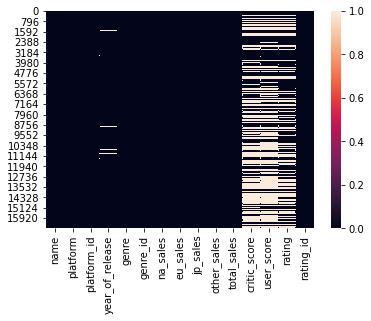

In [96]:
# Visualizing the presence of NaN values by the dataframe

sns.heatmap(df.isnull())
plt.show()

For now, we can see that:

- Most of the missing data is found in columns of numerical values (this can facilitate our work with analysis and filling);


- The `critic_score` column is where more data is missing, less than half of the column is filled;


- `name` and `genre` can be more easily parsed and handled, as they only have 2 NaN values.

[Back to Index](#back)

### Missing values in column `name` <a id='missing_name'></a>

In [97]:
# Let's filter the data that appears without the name of the game

df[df['name'].isnull()]

,name,platform,platform_id,year_of_release,genre,genre_id,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,rating_id
659,NaN,GEN,8,1993.0,NaN,-1,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,-1
14244,NaN,GEN,8,1993.0,NaN,-1,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,-1


In addition to being missing what is one of the most important data, these two rows, compared to the others, have unimpressive values in relation to sales and do not have reviews from critics or users. Let's remove both, reindex the *dataframe* and check the result of this action:

In [98]:
# Removing the rows with missing names, reindexing the remaining data and checking the result

df = df.dropna(subset=['name']).reset_index(drop=True)

df['name'].isnull().sum()

0

[Back to Index](#back)

### Missing values in column `genre is='missing genre'></a>

In [99]:
# Let's filter the data that appears without the game's genre

df[df['genre'].isnull()]

,name,platform,platform_id,year_of_release,genre,genre_id,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,rating_id


They don't exist anymore!

Coincidentally, the rows with missing data in `genre` were the same ones that were missing in the `name` column.

Let's go to the next ones.

[Back to Index](#back)

### Missing values in column `year_of_release` <a id='missing_release'></a>

In [100]:
# Let's review how many NaN values we have in the 'year_of_release' column

print('The number of missing values in column "year_of_release" is ' + str(df['year_of_release'].isnull().sum()) + ', which correspond to ' + (str((df['year_of_release' ].isnull().sum()) / len(df['year_of_release']) * 100)) + '% of data in column.')

The number of missing values in column "year_of_release" is 269, which correspond to 1.6095255190570215% of data in column.


Considering the low percentage, let's remove the rows of null data about the release year:

In [101]:
# Removing NaN values, reindexing the remaining data and checking the result

df = df.dropna(subset= ['year_of_release']).reset_index(drop=True)

df['year_of_release'].isnull().sum()

0

### Missing values in `critic_score` column <a id='missing_release'></a>

In [102]:
# Let's review how many NaN values we have in the 'critic_score' column

print('The number of missing values in column "critic_score" is ' + str(df['critic_score'].isnull().sum()) + ', which correspond to ' + (str((df['critic_score' ].isnull().sum()) / len(df['critic_score']) * 100)) + '% of data in column.')

The number of missing values in column "critic_score" is 8461, which correspond to 51.453417659936754% of data in column.


As the percentage of NaN values in the `critic_score` column is quite significant, we will need to analyze carefully before making any decisions.

Let's look at some rows with this data to see if we have any idea how to proceed:

In [103]:
df[df['critic_score'].isnull()].head(60)

,name,platform,platform_id,year_of_release,genre,genre_id,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,rating_id
1,Super Mario Bros.,NES,11,1985.0,Platform,4,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-1
4,Pokemon Red/Pokemon Blue,GB,5,1996.0,Role-Playing,7,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN,-1
5,Tetris,GB,5,1989.0,Puzzle,5,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,-1
9,Duck Hunt,NES,11,1984.0,Shooter,8,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,-1
10,Nintendogs,DS,4,2005.0,Simulation,9,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,-1
12,Pokemon Gold/Pokemon Silver,GB,5,1999.0,Role-Playing,7,9.00,6.18,7.20,0.71,23.09,NaN,NaN,NaN,-1
18,Super Mario World,SNES,23,1990.0,Platform,4,12.78,3.75,3.54,0.55,20.62,NaN,NaN,NaN,-1
20,Pokemon Diamond/Pokemon Pearl,DS,4,2006.0,Role-Playing,7,6.38,4.46,6.04,1.36,18.24,NaN,NaN,NaN,-1
21,Super Mario Land,GB,5,1989.0,Platform,4,10.83,2.71,4.18,0.42,18.14,NaN,NaN,NaN,-1
22,Super Mario Bros. 3,NES,11,1988.0,Platform,4,9.54,3.44,3.84,0.46,17.28,NaN,NaN,NaN,-1


The data in the other columns looks pretty evenly distributed.

But something to note in these first lines is that the platforms/consoles are old.

Let's try to relate `critic_score` with `year_of_release`, who knows this score was not used after a certain year:

<AxesSubplot:xlabel='year_of_release'>

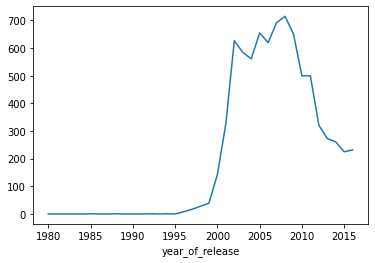

In [104]:
# Let's create a line graph that represents the implementation of 'critic_score' over time

df.groupby('year_of_release')['critic_score'].count().plot()

We can observe that this is a metric more commonly used after the year 1995.

Let's check how much data we have before and after this date:

In [105]:
# Number of games released until 1995

games_pre95 = len(df.query('year_of_release < 1996'))
games_pre95

705

In [106]:
# Number of games released since 1995

games_post95 = len(df.query('year_of_release >= 1996'))
games_post95

15739

In [107]:
# Millions of dollars earned from game sales up to 1995

sales_pre95 = df.query('year_of_release < 1996')['total_sales'].sum()
sales_pre95

747.5799999999999

In [108]:
# Millions of dollars earned from game sales after 1995

salespost_95 = df.query('year_of_release >= 1996')['total_sales'].sum()
salespost_95

8066.79

In [109]:
# Average earnings per game released before and after 1995

print('Before 1995, on average, each game released made a profit of $' + str((sales_pre95/games_pre95).round(2)) + 'mi, which increased to an average of $' + str((salespost_95 /games_post95).round(2)) + 'mi after this year.')

Before 1995, on average, each game released made a profit of $1.06mi, which increased to an average of $0.51mi after this year.


The NaN values of `critic_score` represent almost 5% of the total number of rows in our data, and although apparently the biggest part comes from old games and platforms, we saw that they raked in more profit than those after 1995, i.e. , they are quite important. So **we won't remove these rows.** Simply leaving them blank can be a poor choice when doing table analysis.

Considering the note we made after parsing 'df.corr()' in the "*Categorizing Pre-Data Cleansing*" section, so we don't leave the data blank, rather than simply replacing it with the mean (or median):

- we will create groups with similar sales values in `total_sales`


- we will group the `critic_score` data averages by these groups


- and we'll use their averages to replace what we're missing:

In [110]:
# Checking the game sales data distribution statistic

df['total_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

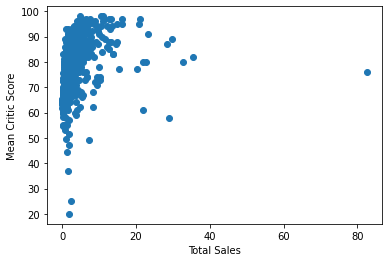

In [111]:
# Generating a scatter chart to analyze the concentration of sales values

grouped = df.groupby('total_sales')['critic_score'].mean()
plt.scatter(grouped.index, grouped.values)
plt.xlabel('Total Sales')
plt.ylabel('Mean Critic Score')
plt.show()

Based on '.describe()' and the scatter plot of total sales, let's divide sales into 10 groups (bins) that had different values:

In [112]:
# Categorizing 'total_sales' into 10 different bins
sales_bins = pd.cut(df['total_sales'], bins=[-0.1, 0.08, 0.16, 0.24, 0.32, 0.4, 0.6, 0.8, 1.0, 2.0, 83.0])

# Calculating and printing the average 'critic_score' for each group
df.groupby(sales_bins)['critic_score'].mean()

total_sales
(-0.1, 0.08]    64.144273
(0.08, 0.16]    64.067784
(0.16, 0.24]    65.397129
(0.24, 0.32]    67.396382
(0.32, 0.4]     69.277652
(0.4, 0.6]      70.910539
(0.6, 0.8]      72.684959
(0.8, 1.0]      75.439628
(1.0, 2.0]      76.746736
(2.0, 83.0]     82.556140
Name: critic_score, dtype: float64

In [113]:
# Naming the average calculation 'critic_score' for each group
grouped_sales = df.groupby(sales_bins)['critic_score'].mean()

# Replacing NaN values in 'critic_score' with bin averages
df['critic_score'] = df['critic_score'].fillna(sales_bins.map(grouped_sales))

In [114]:
# Checking the NaN values in the 'critic_score' column

print('Finally, the number of missing values in the critical_score column is ' + str(df['critic_score'].isnull().sum()))

Finally, the number of missing values in the critical_score column is 0


**Intermediate conclusion**

Normally we would do this **categorization** later on.

But as we could see the approximate interdependence between `total_sales` and the evaluations/scores given to the games, these categories created in advance make it easier for us to fill in the missing values in a more homogeneous/reliable way.

Let's check if we'll use them next, with `user_score` and `rating`.

### Missing values in column `user_score` <a id='missing_user'></a>

Let's start with the same steps for the `user_score` column:

In [115]:
# Let's review how many NaN values we have in the 'user_score' column

print('The number of missing values in column "user_score" is ' + str(df['user_score'].isnull().sum()) + ', which correspond to ' + (str((df['user_score' ].isnull().sum()) / len(df['user_score']) * 100)) + '% of data in column.')

The number of missing values in column "user_score" is 8981, which correspond to 54.61566528825104% of data in column.


Apparently `user_score` is about 500 more NaN rows than `critic_score`.

Let's once again visualize `total_sales` in a scatter plot, confirming the possibility of using our newly created `sales_bins` categories.

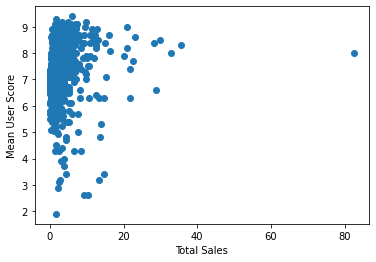

In [116]:
# Generating a scatter chart to analyze the concentration of sales values

grouped = df.groupby('total_sales')['user_score'].mean()
plt.scatter(grouped.index, grouped.values)
plt.xlabel('Total Sales')
plt.ylabel('Mean User Score')
plt.show()

In [117]:
# Replacing NaN values in 'user_score' with bin averages

df['user_score'] = df['user_score'].fillna(sales_bins.map(grouped_sales))


# Checking the NaN values in the 'user_score' column

print('Finally, the number of missing values in the user_score column is ' + str(df['user_score'].isnull().sum()))

Finally, the number of missing values in the user_score column is 0


Apparently we just need to remove the NaN values from the last column.

Let's do it and then check information from the table.

### Missing values in `rating` column <a is='missing rating'></a>

The ESRB (Entertainment Software Rating Board), a system used primarily in North America, assigns a rating to each game based on its content, including violence, language, sexual themes, drug use, and other factors.

There are several possible classifications:

- **E** (Everyone): suitable for all ages.
- **T** (Teen): suitable for teenagers from 13 years old.
- **M** (Mature): suitable for people over 17 years old.
- **E10+** (Everyone 10 and up): suitable for children from 10 years old.
- **AO** (Adults Only): suitable only for adults, from 18 years old.
- **RP** (Rating Pending): the rating has not yet been assigned.
- **EC** (Early Childhood): suitable for young children, from 3 years old.
- **K-A** (Kids to Adults): suitable for all ages (this classification is no longer used).

The `value_counts()` function applied to the `rating` column returns a count of how many games are ranked in each of these categories:

In [118]:
# Let's visualize all the possible values of the indicative classification column
# and see how many times each one appears

df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In the given example, most games are rated "E" (Everyone), followed by "T" (Teen), "M" (Mature) and "E10+" (10 years old and above).

In [119]:
# Checking available columns

df.columns

Index(['name', 'platform', 'platform_id', 'year_of_release', 'genre',
       'genre_id', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
       'total_sales', 'critic_score', 'user_score', 'rating', 'rating_id'],
      dtype='object')

**Checking data distribution**

The nominal variable that perhaps seems to have more to do with `rating` might be `genre`.

Let's examine the unique values in the `genre` column to see if there is an uneven distribution of NaN values across different game genres. If there is an uneven distribution, we can remove NaN values based on the game's genre:

In [120]:
# Creating a new dataframe excluding NaN values in the "rating" column
df_without_rating_nan = df.dropna(subset=['rating'])

# Grouping by genre and counting the number of games in each rating category
df_without_rating_nan.groupby('genre')['rating'].value_counts()

genre         rating
Action        T          670
              M          596
              E10+       468
              E          410
              AO           1
              EC           1
Adventure     E          159
              T          114
              M           98
              E10+        67
              EC           2
Fighting      T          357
              M           48
              E10+        19
              E            8
Misc          E          449
              T          228
              E10+       166
              M           13
              EC           5
              K-A          1
Platform      E          354
              E10+       141
              T           63
              M            3
Puzzle        E          284
              E10+        42
              T           10
Racing        E          576
              T          167
              E10+        95
              M           18
Role-Playing  T          415
              M       

Great, looks like the distribution was pretty even!

Now let's use the fillna() method to fill in the NaN values in the "rating" column.

For this, we can fill in the most common "rating" value for each game genre.

In [121]:
# Let's review how many NaN values we have in the 'rating' column

print('The number of missing values in the "rating" column is ' + str(df['rating'].isnull().sum()) + ', which correspond to ' + (str((df['rating' ].isnull().sum()) / len(df['rating']) * 100)) + '% of the data in the column.')

The number of missing values in the "rating" column is 6676, which correspond to 40.59839455120409% of the data in the column.


In [122]:
# Filling NaN values in 'rating' with the most common value of each game genre
df['rating'] = df.groupby('genre')['rating'].apply(lambda x: x.fillna(x.mode()[0]))

# Checking that there are no more NaN values in the 'rating' column
df['rating'].isna().sum()

0

**Excellent!**

Let's compare the `rating` values by `genre` again now that there are no more NaN:

In [123]:
# Counting the amount of each type of rating
# according to game genre

df.groupby('genre')['rating'].value_counts()

genre         rating
Action        T         1831
              M          596
              E10+       468
              E          410
              AO           1
              EC           1
Adventure     E         1012
              T          114
              M           98
              E10+        67
              EC           2
Fighting      T          762
              M           48
              E10+        19
              E            8
Misc          E         1308
              T          228
              E10+       166
              M           13
              EC           5
              K-A          1
Platform      E          671
              E10+       141
              T           63
              M            3
Puzzle        E          517
              E10+        42
              T           10
Racing        E          946
              T          167
              E10+        95
              M           18
Role-Playing  T         1126
              M       

Almost all of the most common by gender had their values at least tripled.

At least now the NaN were not equal, which would result in a worse data distribution.

Finally, let's check our table to move on to studies with her.

In [124]:
# Checking details of our dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  object  
 2   platform_id      16444 non-null  int8    
 3   year_of_release  16444 non-null  float64 
 4   genre            16444 non-null  object  
 5   genre_id         16444 non-null  int8    
 6   na_sales         16444 non-null  float64 
 7   eu_sales         16444 non-null  float64 
 8   jp_sales         16444 non-null  float64 
 9   other_sales      16444 non-null  float64 
 10  total_sales      16444 non-null  float64 
 11  critic_score     16444 non-null  category
 12  user_score       16444 non-null  category
 13  rating           16444 non-null  object  
 14  rating_id        16444 non-null  int8    
dtypes: category(2), float64(6), int8(3), object(4)
memory usage: 1.3+ MB


Finally!

Complete table!

Let's analyze it!

[Back to Index](#back)

# Study of the fundamental parameters <a id='parameters1'></a>

## Sales per year

Let's use the `year_of_release` column to analyze how many games were released per year, since the first one we have registered.

We will make use of the `.count()` method instead of `.nunique()` because the same game may have been released in different years for different platforms and have its own sales metric, even though, at its root, it is the same game released elsewhere or on another platform.

In [125]:
# Counting the number of games released each year

games_per_year = df.groupby('year_of_release')['name'].count()

games_per_year

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Text(0, 0.5, 'Number of games')

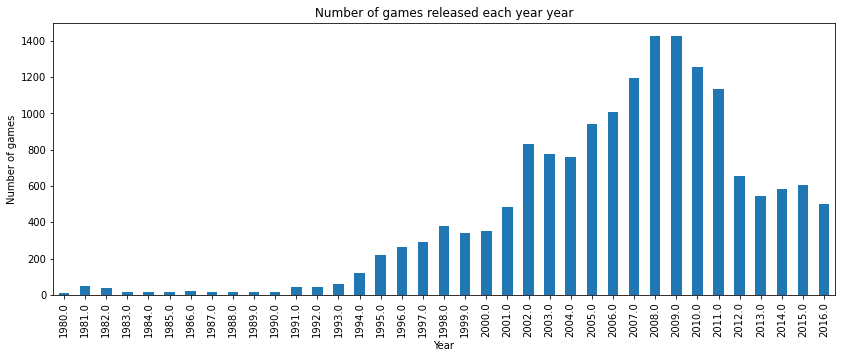

In [126]:
games_per_year.plot(kind='bar', figsize=(14,5))
plt.title('Number of games released each year year')
plt.xlabel('Year')
plt.ylabel('Number of games')

As we noted earlier, criticism of games began to exist more frequently after the year 1995, probably because it was in the early 90s that we started to have more game releases per year.

But let's now see how much was the total sales value in the games market and the average of this value for each game over time.

Text(0, 0.5, 'Millions of dollars')

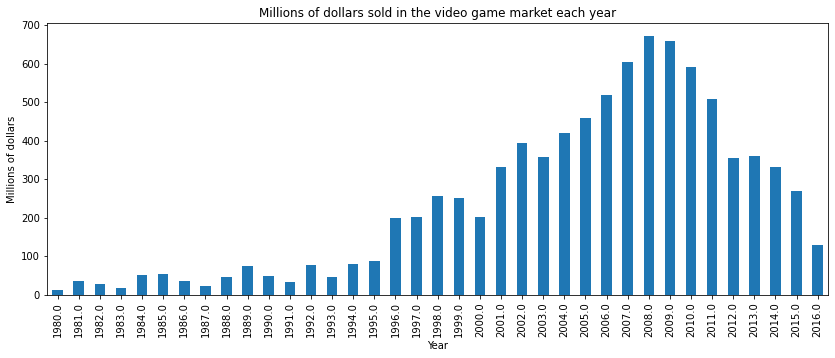

In [127]:
# Counting the total amount raised from game sales for each year

sales_sum_per_year = df.groupby('year_of_release')['total_sales'].sum()

sales_sum_per_year.plot(kind='bar', figsize=(14,5))
plt.title('Millions of dollars sold in the video game market each year')
plt.xlabel('Year')
plt.ylabel('Millions of dollars')

Text(0, 0.5, 'Millions of dollars')

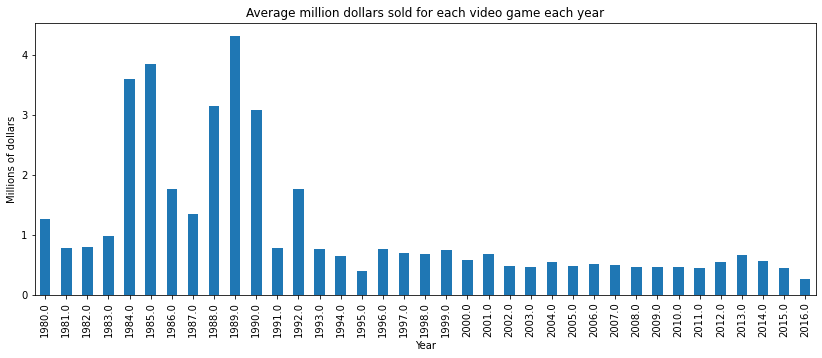

In [128]:
# Counting the total amount raised from sales for each game for each year

sales_mean_per_year = df.groupby('year_of_release')['total_sales'].mean()

sales_mean_per_year.plot(kind='bar', figsize=(14,5))
plt.title('Average million dollars sold for each video game each year')
plt.xlabel('Year')
plt.ylabel('Millions of dollars')

Now yes! Look how funny.

The games market has increased so much since the beginning of the 90s that, although we sell many games and the sum of these sales in the market is much greater than in the beginning, each game has an individual profit much smaller than when they had more demand and less supply.

**A clear example:**

**Year 1980:** Lowest number of games in the market - lowest investment in the games market - profit of **over 1m per game**

**Year 2008:** Highest number of games on the market - highest investment in the games market - profit of **less than 1m per game**

## Platforms with the most sales

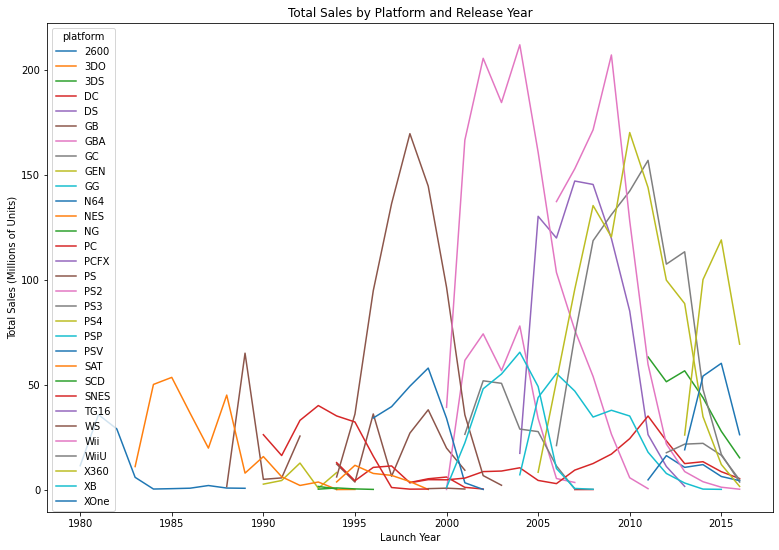

In [129]:
# Grouping the data by platform and year of launch and adding sales
platform_sales_years = df.groupby(['platform', 'year_of_release'])['total_sales'].sum()

# Unstacking the data to have each platform as a separate column
platform_sales_years = platform_sales_years.unstack(level=0)

# Plotting the data
platform_sales_years.plot(figsize=(13, 9))

# Defining the chart title and axis labels
plt.title('Total Sales by Platform and Release Year')
plt.xlabel('Launch Year')
plt.ylabel('Total Sales (Millions of Units)')

# Showing the chart
plt.show()

In the previous code, we create a DataFrame that contains the sum of total sales for each platform, using the groupby method from the Pandas library. The "platform_sales" variable receives the result of this grouping and displays the information in descending sales order.

Then we created a line chart using the Matplotlib library, with the aim of graphically visualizing the evolution of sales for each platform over time. To do this, the code uses a loop to create a line chart for each platform, with total sales on the y-axis and year of release on the x-axis.

- It is possible to observe that the older platforms, such as Atari 2600 and 3DO, had a peak in sales at the beginning, while the most recent highs in sales were Play Station 4 and Xbox One.


- Between the penultimate and last years of collection, we can observe that the lines referring to all platforms indicate decline. That is, it was a year in which no platform grew.


- Among those that were on the market (with the colored line reaching the right corner of the graph), despite having lower sales than the other platforms, the Nintendo Wii appears to be the most stable (coming on a less steep slope) and the one with the highest sales peak (2009-2010)


- Despite being in a sharp drop in sales, Play Station 4 had its peak in about 1 year and is the one that sold the most in 2016, followed by Xbox One, with less than half of its sales. Both platforms entered the market in the same year.


- In this graph formed by `platform_sales_years` we can also visualize **the platforms that were once popular and then had no more sales**. We do this like moving a vertical ruler from left to right and looking at all that were at the top each year. If this line does not have continuity, it fits this question. Platforms that fit this criteria are:
     * 2600 (first dark blue line)
     * 3DO (first orange)
     * DC (first red)
     * PS (brown in half)
     * PS2 (highest pink)

In [130]:
# Selecting only the platforms with the highest total sales
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

top_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

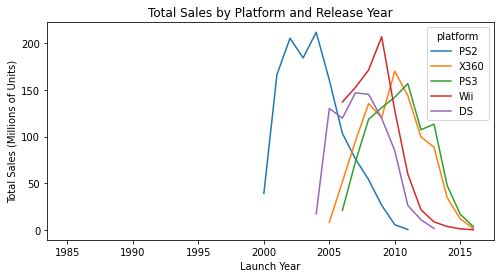

In [131]:
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index.tolist()
platform_sales_years = platform_sales_years[top_platforms]

# Plotting the data
platform_sales_years.plot(figsize=(8, 4))

# Defining the chart title and axis labels
plt.title('Total Sales by Platform and Release Year')
plt.xlabel('Launch Year')
plt.ylabel('Total Sales (Millions of Units)')

# Showing the chart
plt.show()

Now we've basically zoomed in on the top five sales and as expected:

    - PS2 and Nintendo DS no longer sell
   
   
    - Nintendo Wii didn't surpass the PS2 but it was the best seller around 2008-2009
   
   
    - Wii sales dropped sharply between 2009 and 2012 but were less pronounced than PS3 and X360 around 2016

In [132]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=True).head()

platform
PCFX    0.03
GG      0.04
3DO     0.10
TG16    0.16
WS      1.42
Name: total_sales, dtype: float64

- The best-selling platform of all time was Play Station 2, followed by Xbox 360 and Play Station 3, both with about three-quarters of the "winner".


- The platforms that sold the least were PC-FX and Game Gear(GG).

In [133]:
# Finding the video games that have been available the longest on the market

platform_years = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_years = platform_years.rename(columns={'min': 'first_year', 'max': 'last_year'})
platform_years['years_on'] = platform_years['last_year'] - platform_years['first_year'] + 1
platform_years.sort_values(by= 'years_on', ascending=False).head()

,first_year,last_year,years_on
platform,,,
PC,1985.0,2016.0,32.0
DS,1985.0,2013.0,29.0
GB,1988.0,2001.0,14.0
X360,2005.0,2016.0,12.0
PSP,2004.0,2015.0,12.0


Among the first 5 successful platforms with the longest sales time, the only two still on the market on the date of data collection were computers (PCs) and Xbox 360 (X360).

In [134]:
# Finding video games were less time available on the market

platform_years.sort_values(by= 'years_on', ascending=True).head()

,first_year,last_year,years_on
platform,,,
GG,1992.0,1992.0,1.0
PCFX,1996.0,1996.0,1.0
TG16,1995.0,1995.0,1.0
3DO,1994.0,1995.0,2.0
SCD,1993.0,1994.0,2.0


- The TurboGrafx-16 (TG16), PC-FX and Game Gear(GG) video game consoles did not complete 1 full year on the market. What could have been the reason for the failure?


- All these little successes were released in the second decade of the first video games.

In [135]:
# Finding the first video games available on the market

platform_years.sort_values(by= 'first_year', ascending=True).head()

,first_year,last_year,years_on
platform,,,
2600,1980.0,1989.0,10.0
NES,1983.0,1994.0,12.0
DS,1985.0,2013.0,29.0
PC,1985.0,2016.0,32.0
GB,1988.0,2001.0,14.0


- Among the first 5 platforms launched, none "survived" for less than 10 years.


- Computer games came only 5 years after the first console (Atari 2600) and remained until today.


- The oldest console that has been around the longest is the Nintendo DS (29 years).

In [136]:
# Finding video games that were available in the year of data collection

platform_years.sort_values(by= 'last_year', ascending=False).head(10)

,first_year,last_year,years_on
platform,,,
XOne,2013.0,2016.0,4.0
3DS,2011.0,2016.0,6.0
X360,2005.0,2016.0,12.0
WiiU,2012.0,2016.0,5.0
Wii,2006.0,2016.0,11.0
PSV,2011.0,2016.0,6.0
PC,1985.0,2016.0,32.0
PS4,2013.0,2016.0,4.0
PS3,2006.0,2016.0,11.0


Among the 9 video games available on the market in the year data were collected, the platform that had been around for the longest time was the computer (PC), which was 32 years old, and then the Xbox 360, the "oldest" console in the current group.

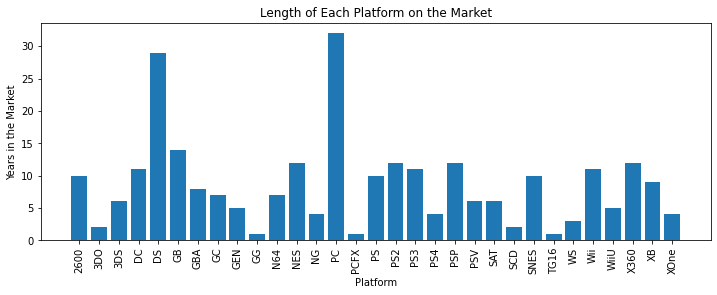

In [137]:
# Creating a bar chart for the duration of each platform on the market
plt.figure(figsize=(12, 4))
plt.bar(platform_years.index, platform_years['years_on'])

# Defining the axis title and labels
plt.title('Length of Each Platform on the Market')
plt.xlabel('Platform')
plt.ylabel('Years in the Market')

# Adjusting the rotation of x-axis labels
plt.xticks(rotation=90)

# Showing the chart
plt.show()

When we summarize `platform_years` in a graph, it becomes even more evident that:

- The two platforms that have been on the market the longest outdistance any other by at least twice as long


- Among the 5 platforms with the most sales (PS2, X360, PS3, Wii and DS), all were between 9 and 11 years on the market, except for DS which almost reached its 30 years of sales

[Back to Index](#back)

## Designing a template for 2017

Based on our evidence and findings in the previous section, let's filter the data by disregarding platforms from previous years and focusing on potentially profitable platforms for the coming year.

That is, since we don't have any data for 2017, at the very least, we need to choose only those platforms that were still active in 2016 and, who knows, maybe also consider all their games, genres and ratings for relevant prospects:

In [138]:
# Let's review the columns present in our 'df'

df.columns

Index(['name', 'platform', 'platform_id', 'year_of_release', 'genre',
       'genre_id', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
       'total_sales', 'critic_score', 'user_score', 'rating', 'rating_id'],
      dtype='object')

Before carrying out this filtering, **let's enrich** our main table, with the three new columns that deal with the first and last years of launch of games on the platform, as well as the active years:

In [139]:
# Merging the two DataFrames by the platform column
# Adding the three columns first_year, last_year and years_on from the secondary df to the main df

df = df.set_index('platform').merge(platform_years, how='left', left_index=True, right_index=True)

# Checking the first lines

df.head()

,name,platform_id,year_of_release,genre,genre_id,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,rating_id,first_year,last_year,years_on
platform,,,,,,,,,,,,,,,,,
2600,Pac-Man,0,1982.0,Puzzle,5,7.28,0.45,0.0,0.08,7.81,82.55614,82.55614,E,-1,1980.0,1989.0,10.0
2600,Pitfall!,0,1981.0,Platform,4,4.21,0.24,0.0,0.05,4.50,82.55614,82.55614,E,-1,1980.0,1989.0,10.0
2600,Asteroids,0,1980.0,Shooter,8,4.00,0.26,0.0,0.05,4.31,82.55614,82.55614,M,-1,1980.0,1989.0,10.0
2600,Missile Command,0,1980.0,Shooter,8,2.56,0.17,0.0,0.03,2.76,82.55614,82.55614,M,-1,1980.0,1989.0,10.0
2600,Frogger,0,1981.0,Action,0,2.06,0.12,0.0,0.02,2.20,82.55614,82.55614,T,-1,1980.0,1989.0,10.0


Now we can use our `df` to create `df_new`, first filtering only the platforms that were released in 2016, as an indication that they were still active at the time, and would continue in 2017, as well as only the games released within of the last 10 years, as it was a regular success time for a platform:

In [140]:
# Filtering newer platforms

df_new = df.query('last_year > 2015 & year_of_release > 2006')
df_new = df_new.reset_index()
df_new.head()

,platform,name,platform_id,year_of_release,genre,genre_id,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,rating_id,first_year,last_year,years_on
0,3DS,Pokemon X/Pokemon Y,2,2013.0,Role-Playing,7,5.28,4.19,4.35,0.78,14.60,82.55614,82.55614,T,-1,2011.0,2016.0,6.0
1,3DS,Mario Kart 7,2,2011.0,Racing,6,5.03,4.02,2.69,0.91,12.65,82.55614,82.55614,E,1,2011.0,2016.0,6.0
2,3DS,Pokemon Omega Ruby/Pokemon Alpha Sapphire,2,2014.0,Role-Playing,7,4.35,3.49,3.10,0.74,11.68,82.55614,82.55614,T,-1,2011.0,2016.0,6.0
3,3DS,Super Mario 3D Land,2,2011.0,Platform,4,4.89,3.00,2.14,0.78,10.81,82.55614,82.55614,E,1,2011.0,2016.0,6.0
4,3DS,New Super Mario Bros. 2,2,2012.0,Platform,4,3.66,3.14,2.47,0.63,9.90,82.55614,82.55614,E,1,2011.0,2016.0,6.0


In [141]:
print('Our previous "df" had ' + str(len(df)) + ' rows, while our new one has ' + str(len(df_new)) + ', i.e. current platform game data represents ' + str((round(len(df_new)/len(df)*100, 1)
)) + '% of the original table.')

Our previous "df" had 16444 rows, while our new one has 6093, i.e. current platform game data represents 37.1% of the original table.


In [142]:
df_new['genre'].value_counts()

Action          1654
Sports           819
Misc             659
Shooter          602
Role-Playing     535
Adventure        432
Racing           373
Simulation       261
Fighting         237
Strategy         220
Platform         192
Puzzle           109
Name: genre, dtype: int64

We still have 12 game genres.

In [143]:
df_new['platform'].value_counts()

PS3     1279
Wii     1242
X360    1121
PC       724
3DS      512
PSV      429
PS4      392
XOne     247
WiiU     147
Name: platform, dtype: int64

We only have 9 active platforms in 2016.

Let's create a box plot showing global sales by platform:

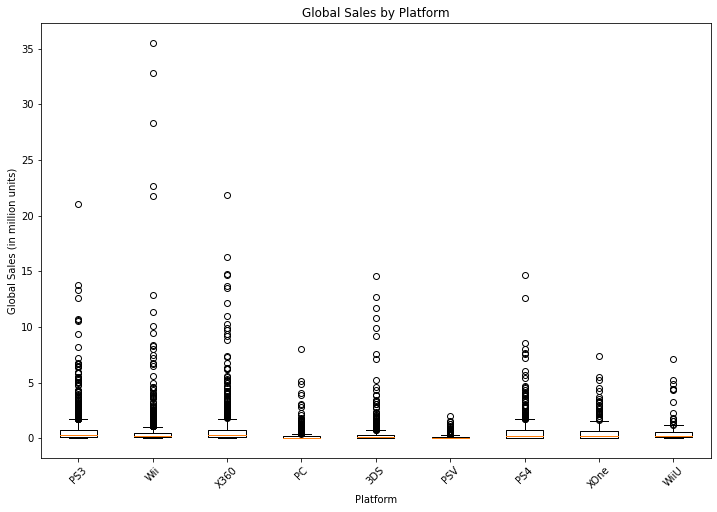

In [145]:
# Selecting column of interest in dataframe
global_sales = df_new['total_sales']

# Defining platforms to be plotted
platforms = ['PS3', 'Wii', 'X360', 'PC', '3DS', 'PSV', 'PS4', 'XOne', 'WiiU']

# Creating a list of global sales for each platform
data = [global_sales[df_new['platform']==p] for p in platforms]

# Configuring the chart
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Global Sales by Platform')
ax.set_xlabel('Platform')
ax.set_ylabel('Global Sales (in million units)')
ax.boxplot(data)
ax.set_xticklabels(platforms, rotation=45)

# displaying the graph
plt.show()

To the naked eye, PC, PSV and 3DS are visually different but perhaps don't appear to be drastic differences given the fact that we have many *outliers* in the rest of the graph.

To be able to say with more certainty or not, let's use the ANOVA statistical test using the "f_oneway" function of the "scipy.stats" module:

In [146]:
from scipy.stats import f_oneway

# Defining global sales for each platform
ps3_sales = global_sales[df_new['platform'] == 'PS3']
wii_sales = global_sales[df_new['platform'] == 'Wii']
x360_sales = global_sales[df_new['platform'] == 'X360']
pc_sales = global_sales[df_new['platform'] == 'PC']
ds_sales = global_sales[df_new['platform'] == '3DS']
psv_sales = global_sales[df_new['platform'] == 'PSV']
ps4_sales = global_sales[df_new['platform'] == 'PS4']
xone_sales = global_sales[df_new['platform'] == 'XOne']
wiiu_sales = global_sales[df_new['platform'] == 'WiiU']

# Performing the ANOVA
fvalue, pvalue = f_oneway(ps3_sales, wii_sales, x360_sales, pc_sales, ds_sales, psv_sales, ps4_sales, xone_sales, wiiu_sales)

# Printing the result
if pvalue < 0.05:
     print("The differences in sales are statistically significant.")
else:
     print("The differences in sales are not statistically significant.")

The differences in sales are statistically significant.


According to the ANOVA statistical test, we were able to confirm that the differences in sales are significant and, above all, we learned that inferences with the naked eye can bring us great complications.

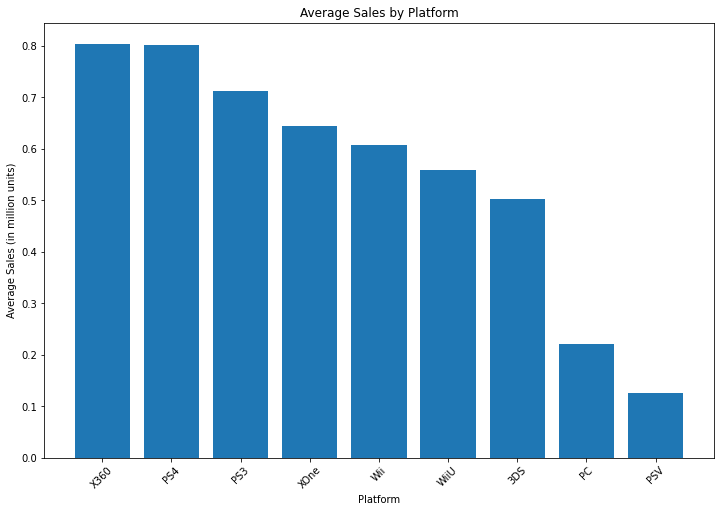

In [147]:
# Grouping data by platform and averaging global sales
platform_sales = df_new.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

# Creating bar chart for average sales per platform
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Average Sales by Platform')
ax.set_xlabel('Platform')
ax.set_ylabel('Average Sales (in million units)')
ax.bar(platform_sales.index, platform_sales.values)
ax.set_xticks(range(len(platforms)))
ax.set_xticklabels(platform_sales.index, rotation=45)

# displaying the graph
plt.show()

As for average sales, we have X360 in first place, followed by PS4 and PS3, as seen in the graph.

In [149]:
platform_sales.head()

platform
X360    0.804077
PS4     0.801378
PS3     0.711790
XOne    0.645020
Wii     0.607110
Name: total_sales, dtype: float64

[Back to Index](#back)

## The influence of reviews on sales

Let's use matplotlib's scatter method to plot the scatter plot, where the x-axis represents user ratings and the y-axis represents critic ratings. The size of the points will be proportional to the total sales.

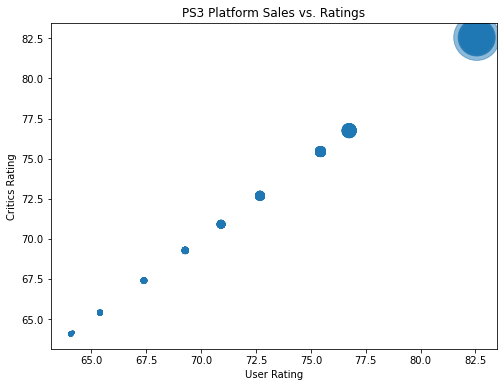

In [150]:
df_ps3 = df_new[df_new['platform'] == 'PS3'][['total_sales', 'user_score', 'critic_score']]

x = df_ps3['user_score']
y = df_ps3['critic_score']
size = df_ps3['total_sales']

fig, ax = plt.subplots(figsize=(8,6))

scatter = ax.scatter(x, y, s=size*100, alpha=0.5)

ax.set_xlabel('User Rating')
ax.set_ylabel('Critics Rating')
ax.set_title('PS3 Platform Sales vs. Ratings')

plt.show()

It's even nice to see. We observe a scatter plot that almost looks like one of gradually growing lines.

It's clear that sales are all about reviews.

In [151]:
total_sales = df_new['total_sales']
df_new['user_score'].corr(total_sales)


0.6390744094183012

As always, contrary to what our eyes judge, the numbers say that the correlation between user reviews and sales is 0.6390744094183012, which suggests a moderate positive correlation between these two variables.

Probably our imputation made on user scores (# Replacing NaN values in 'user_score' with bin averages) is influential in this conclusion.

## The top four games on the top four platforms

Let's see how different games behave on different platforms.

**The top four games**

First, for our `df_new` we'll add up all the `total_sales` of rows of games with the same name and find the revenue for each game, sorting in descending order to see the top 4 sellers:

In [152]:
df_games_added = df_new.groupby('name', as_index=False)['total_sales'].sum()
df_games_added.sort_values(by='total_sales', ascending=False).head(4)

,name,total_sales
1267,Grand Theft Auto V,56.58
1852,Mario Kart Wii,35.52
3645,Wii Sports Resort,32.77
437,Call of Duty: Modern Warfare 3,30.60


What have we just discovered?

When we add up the sales of the games on all the platforms on which they are available, we find that, in fact, the four games that raised the most were:

- Grand Theft AutoV
- Mario Kart Wii
- Wii Sports Resort
- Call of Duty: Modern Warfare 3

Even the first, GTA V, grossed almost twice as much as the fourth best seller.

**The top four platforms**

Second, for our `df_new` we'll add all `total_sales` from rows of platforms with the same names and find the revenue for each platform, sorting in descending order to see the 4 that sold the most:

In [153]:
df_platforms_added = df_new.groupby('platform', as_index=False)['total_sales'].sum()
df_platforms_added.sort_values(by='total_sales', ascending=False).head(4)

,platform,total_sales
2,PS3,910.38
7,X360,901.37
5,Wii,754.03
3,PS4,314.14


What did we discover this time?

When we add up the sales of all platforms, we find that, in fact, the four that raised the most were:

- PS3
- X360
- Wii
- PS4

Including the first, PS3, collected almost four times more than the fourth best seller.

**Filtering with both conditions**

Now let's filter our `df_new` with only the 4 most popular games and the 4 most popular platforms:

In [154]:
# Selecting only the lines that have the 4 specified games and the 4 specified platforms

df_top4games_plats = df_new.query("name in ['Grand Theft Auto V', 'Mario Kart Wii', 'Wii Sports Resort', 'Call of Duty: Modern Warfare 3'] and platform in ['PS3', 'X360' , 'Wii', 'PS4']")

sales_by_game_platform = df_top4games_plats.groupby(['name', 'platform'])['total_sales'].sum()

sales_by_game_platform

name                            platform
Call of Duty: Modern Warfare 3  PS3         13.33
                                Wii          0.83
                                X360        14.73
Grand Theft Auto V              PS3         21.05
                                PS4         12.62
                                X360        16.27
Mario Kart Wii                  Wii         35.52
Wii Sports Resort               Wii         32.77
Name: total_sales, dtype: float64

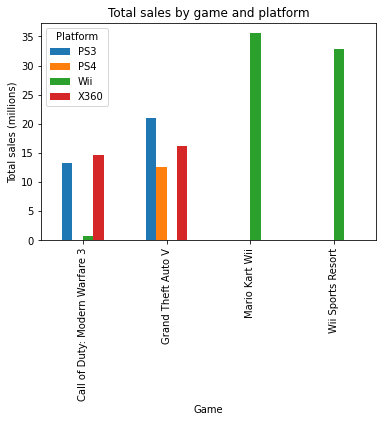

In [155]:
import matplotlib.pyplot as plt

sales_by_game_platform.unstack().plot.bar(rot=90)

plt.title('Total sales by game and platform')
plt.xlabel('Game')
plt.ylabel('Total sales (millions)')
plt.legend(title='Platform')

plt.show()

**Conclusion on the 4 that raised the most**

- 'Mario Kart Wii' and 'Wii Sports Resort' are the 2nd and 3rd games with the most revenue but were not even sold outside of their original platform


- 'Grand Theft Auto V' is the best-selling game if the three platforms where it was made available are added together (PS3, X360 and PS4), because if only one platform were counted, it wouldn't go beyond Nintendo Wii games


- Although 'Call of Duty: Modern Warfare 3' was made available on 3 platforms, strangely one of them is the Wii (so much so that the collection was negligible compared to the others) and even without having been released on PS4, it is already among the 4 top selling games.

## Overall distribution of games by genre

Let's try to see if there is any influence of game genres on sales:

In [156]:
# Counting the distribution of number of games by genres

genre_counts = df_new['genre'].value_counts()
genre_counts

Action          1654
Sports           819
Misc             659
Shooter          602
Role-Playing     535
Adventure        432
Racing           373
Simulation       261
Fighting         237
Strategy         220
Platform         192
Puzzle           109
Name: genre, dtype: int64

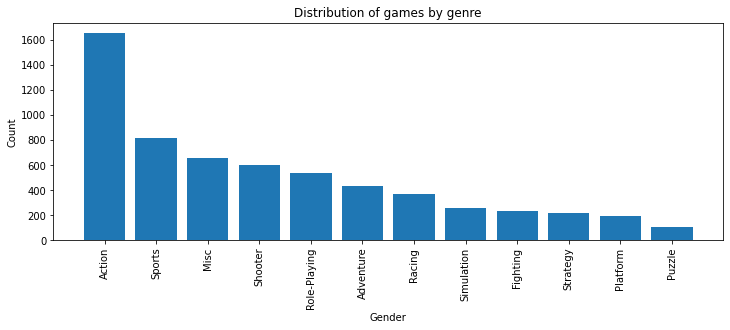

In [157]:
# Generating a distribution chart of games by genre

fig, ax = plt.subplots(figsize=(12,4))

ax.bar(genre_counts.index, genre_counts.values)
ax.set_title('Distribution of games by genre')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_xticks(range(len(genre_counts.index)))
ax.set_xticklabels(genre_counts.index, rotation=90)

plt.show()

It's interesting to know how many games we had of each genre.

But what about the revenue, in millions of dollars, for each type?

Which genre will bring more profit?

In [158]:
# Counting the sum of game collections by genres

genre_sales = df_new.groupby('genre')['total_sales'].sum()
genre_sales.sort_values(ascending=False)

genre
Action          874.46
Shooter         658.60
Sports          564.10
Misc            357.74
Role-Playing    323.47
Racing          229.48
Platform        192.10
Fighting        137.51
Simulation      111.65
Adventure        76.33
Strategy         46.82
Puzzle           21.36
Name: total_sales, dtype: float64

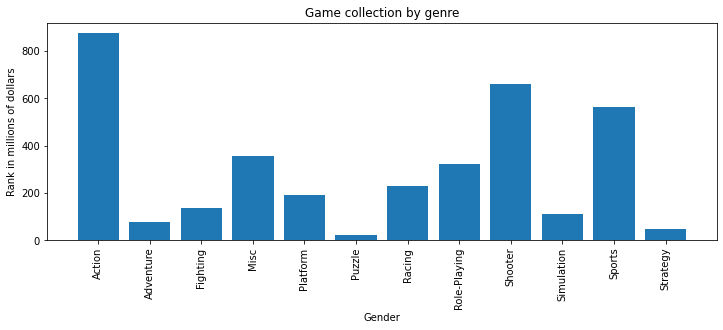

In [159]:
# Generating a graph of game collections by genre

fig, ax = plt.subplots(figsize=(12,4))

ax.bar(genre_sales.index, genre_sales.values)
ax.set_title('Game collection by genre')
ax.set_xlabel('Gender')
ax.set_ylabel('Rank in millions of dollars')
ax.set_xticks(range(len(genre_sales.index)))
ax.set_xticklabels(genre_sales.index, rotation=90)

plt.show()

There it is.

Specifically for these years and these platforms:

- 'Action' genre had more games and also higher profit from sales


- However, despite being the second genre with the most 'Sports' games, it ranked as the third profit generator


- Between number of games and profit generated, it seems that each genre doesn't change much more than 2 positions in the "ranking"

But let's see how this profit distribution would be individually for each game, using the arithmetic mean.

In [160]:
# Counting the sum of average collections for each game according to its genre

genre_mean = df_new.groupby('genre')['total_sales'].mean()
genre_mean.sort_values(ascending=False)

genre
Shooter         1.094020
Platform        1.000521
Sports          0.688767
Racing          0.615228
Role-Playing    0.604617
Fighting        0.580211
Misc            0.542853
Action          0.528694
Simulation      0.427778
Strategy        0.212818
Puzzle          0.195963
Adventure       0.176690
Name: total_sales, dtype: float64

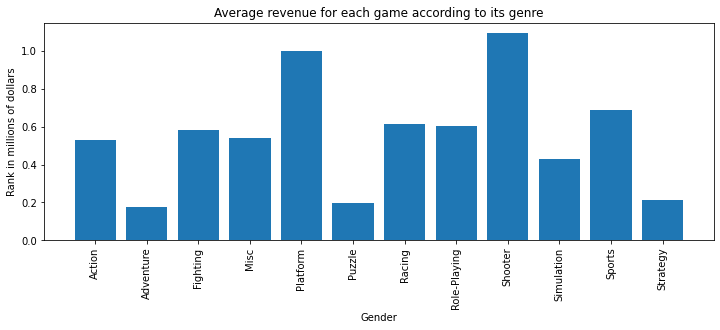

In [161]:
# Generating a graph of average collections for each game by genre

fig, ax = plt.subplots(figsize=(12,4))

ax.bar(genre_mean.index, genre_mean.values)
ax.set_title('Average revenue for each game according to its genre')
ax.set_xlabel('Gender')
ax.set_ylabel('Rank in millions of dollars')
ax.set_xticks(range(len(genre_mean.index)))
ax.set_xticklabels(genre_mean.index, rotation=90)

plt.show()

Here it is!

And now? Where did the 'Action' genre go? It ranks eighth in earnings for each game in the given genre.


- 'Puzzle', 'Strategy' and 'Adventure' are still last in line, apparently it's not a good idea to invest in these genres if a company is really aiming for profit


- Although 'Shooter' is in fourth place in the number of games available, it appears as the one with the highest average profit per game


- Look then at the 'Platform' genre! He is the penultimate in number of games available, but the second to give more profit per game!

Looks like we already have some ideas for investment suggestions for the following year, right?

**But can we generalize on these choices?**

We can see that the most profitable genres are Action, Shooter and Sports, which account for almost half of the total game sales. However, the average profitability per game is higher in genres such as Shooter, Platform and Sports.

It is important to note that we cannot completely generalize about genres with high or low sales, as there are many factors that affect the sale and profitability of a game, such as the quality of the game, the platform, the marketing campaign, among others. Therefore, it's important to look at each game individually and consider factors other than genre.

[Back to Index](#back)

# Deepening the applications <a id='parameters3'></a>

Before moving on to our hypothesis tests, let's do our last data enrichments and analysis, focusing now on the regions in which our data are being distributed and observed.

Let's start by reviewing our table:

In [162]:
df_new.shape

(6093, 18)

In [163]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6093 entries, 0 to 6092
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   platform         6093 non-null   object  
 1   name             6093 non-null   object  
 2   platform_id      6093 non-null   int8    
 3   year_of_release  6093 non-null   float64 
 4   genre            6093 non-null   object  
 5   genre_id         6093 non-null   int8    
 6   na_sales         6093 non-null   float64 
 7   eu_sales         6093 non-null   float64 
 8   jp_sales         6093 non-null   float64 
 9   other_sales      6093 non-null   float64 
 10  total_sales      6093 non-null   float64 
 11  critic_score     6093 non-null   category
 12  user_score       6093 non-null   category
 13  rating           6093 non-null   object  
 14  rating_id        6093 non-null   int8    
 15  first_year       6093 non-null   float64 
 16  last_year        6093 non-null   float64 


We now have 6093 rows of data, sorted into 18 variables/columns.

However `critic_score` and `user_score` have unexpected data types.

Let's fix them:

In [164]:
# Converting both columns to numeric

df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [165]:
df_new.head()

,platform,name,platform_id,year_of_release,genre,genre_id,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,rating_id,first_year,last_year,years_on
0,3DS,Pokemon X/Pokemon Y,2,2013.0,Role-Playing,7,5.28,4.19,4.35,0.78,14.60,82.55614,82.55614,T,-1,2011.0,2016.0,6.0
1,3DS,Mario Kart 7,2,2011.0,Racing,6,5.03,4.02,2.69,0.91,12.65,82.55614,82.55614,E,1,2011.0,2016.0,6.0
2,3DS,Pokemon Omega Ruby/Pokemon Alpha Sapphire,2,2014.0,Role-Playing,7,4.35,3.49,3.10,0.74,11.68,82.55614,82.55614,T,-1,2011.0,2016.0,6.0
3,3DS,Super Mario 3D Land,2,2011.0,Platform,4,4.89,3.00,2.14,0.78,10.81,82.55614,82.55614,E,1,2011.0,2016.0,6.0
4,3DS,New Super Mario Bros. 2,2,2012.0,Platform,4,3.66,3.14,2.47,0.63,9.90,82.55614,82.55614,E,1,2011.0,2016.0,6.0


## Creating a user profile for each region

In [166]:
# North America (NA) Region User
na_user = df_new[['na_sales', 'platform', 'genre', 'rating']]

# Europe Region User (EU)
eu_user = df_new[['eu_sales', 'platform', 'genre', 'rating']]

# Japan Region User (JP)
jp_user = df_new[['jp_sales', 'platform', 'genre', 'rating']]

## Top 5 platforms by region

Let's group data from the platforms used to compare this data from each region:

In [167]:
# Platforms in the North America (NA) Region
na_top_platforms = na_user.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
na_top_platforms

platform
X360    553.68
Wii     416.01
PS3     381.29
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64

In [168]:
# Platforms in Europe Region (EU)
eu_top_platforms = eu_user.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_top_platforms

platform
PS3     319.83
X360    257.05
Wii     214.70
PS4     141.09
PC       98.38
Name: eu_sales, dtype: float64

In [169]:
# Platforms in Japan Region (JP)
jp_top_platforms = jp_user.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_top_platforms

platform
3DS    100.62
PS3     78.33
Wii     59.13
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64

**By looking at the top five platforms in each region**, we can see some variations in market shares. In North America, the most popular platforms are X360, Wii and PS3, while in Europe, the most popular platforms are PS3, X360 and Wii. In Japan, the most popular platform is 3DS, followed by PS3 and Wii.

Furthermore, market shares of platforms can vary greatly from region to region. For example, the PS4 is fourth in sales in North America, but second in Europe. Already in Japan, the PS4 is in fifth place and the 3DS leads with a wide advantage. These differences may be related to several factors, such as cultural preferences, launch of exclusive games for a certain platform in each region, differences in the price of consoles, among others.

## Top 5 genres by region

In [170]:
# Genres in the North America (NA) Region
na_top_genres = na_user.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
na_top_genres

genre
Action          406.28
Shooter         338.84
Sports          285.46
Misc            200.42
Role-Playing    130.83
Name: na_sales, dtype: float64

In [171]:
# Genres in Europe Region (EU)
eu_top_genres = eu_user.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_top_genres

genre
Action     296.28
Shooter    225.86
Sports     191.22
Misc       101.23
Racing      94.33
Name: eu_sales, dtype: float64

In [172]:
# Genres in Region Japan (JP)
jp_top_genres = jp_user.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_top_genres

genre
Role-Playing    78.49
Action          71.77
Sports          27.16
Misc            23.07
Platform        22.54
Name: jp_sales, dtype: float64

**The difference in the top five genres across the three regions** can be explained by player preferences in each market. In North America and Europe, the best-selling genres are action, shooting and sports, while in Japan, the most popular genre is RPG. This could be due to cultural and historical differences in gaming preferences, as well as differences in player tastes and habits in each region.

Apparently 'Action' and 'Sports' are the ones that remain within the top three preferences across all regions.

[Back to Index](#back)

## Effect of ESRB rating on sales by region

In [173]:
# ESRB Ranking on Sales in the North America (NA) Region
na_sales_by_rating = na_user.groupby('rating')['na_sales'].sum()
na_sales_by_rating.sort_values(ascending=False)

rating
M       561.49
E       545.50
T       397.32
E10+    224.88
EC        0.71
RP        0.00
Name: na_sales, dtype: float64

In [174]:
# ESRB Sales Rank in Europe Region (EU)
eu_sales_by_rating = eu_user.groupby('rating')['eu_sales'].sum()
eu_sales_by_rating.sort_values(ascending=False)

rating
M       401.43
E       397.19
T       253.40
E10+    130.06
RP        0.03
EC        0.00
Name: eu_sales, dtype: float64

In [175]:
# ESRB Sales Rank in Japan Region (JP)
jp_sales_by_rating = jp_user.groupby('rating')['jp_sales'].sum()
jp_sales_by_rating.sort_values(ascending=False)

rating
T       138.26
E       108.45
M        40.69
E10+     12.65
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64

Yes, **ESRB ratings affect sales in individual regions**. We can see that the M (mature) grade is the best seller in North America, while the T (teen) grade is the best seller in Japan. In Europe, the M rating is the most sold, but the difference with other ratings is not as big as in North America. This could indicate that audiences in these regions have different preferences regarding ESRB ratings.

# Testing hypotheses <a id='testing hypothesis'></a>

In this penultimate section, we will carry out some tests to verify the following hypotheses:

     1 Are the average user ratings of the Xbox One and PC platforms the same?

     2 Are the average user ratings for the Action and Sports genres different?

## Hypothesis 1

Let's start by testing hypothesis 1 that `user_score` for Xbox One and PC are the same.

To test the hypothesis that the mean ratings of Xbox One and PC platform users are the same, we need to establish the null and alternative hypotheses:

Null hypothesis (H0): The mean ratings of Xbox One platform users are equal to the mean ratings of PC platform users.

Alternative hypothesis (H1): The mean ratings of Xbox One platform users are different from the mean ratings of PC platform users.

To test the hypothesis, we can use a two-sample t-test, considering that the ratings of users of each platform form an independent sample. The alpha value is set to 0.01 to determine the significance level of the test.

In [176]:
# Defining the samples for each platform
xbox_one_user_score = df_new.query('platform == "XOne"')['user_score']
pc_user_score = df_new.query('platform == "PC"')['user_score']

# Removing null values
xbox_one_user_score = xbox_one_user_score.dropna()
pc_user_score = pc_user_score.dropna()

# Hypothesis test
alpha = 0.01

results = st.ttest_ind(xbox_one_user_score, pc_user_score, equal_var=False)

print('p-value:', results.pvalue)

# Conclusion
if results.pvalue < alpha:
     print("We reject the null hypothesis")
else:
     print("We failed to reject the null hypothesis")

print('Xbox One User Average:', xbox_one_user_score.astype(float).mean())
print('User average for PC:', pc_user_score.astype(float).mean())

p-value: 3.77459958062316e-14
We reject the null hypothesis
Xbox One User Average: 69.18823267067658
User average for PC: 65.8781403397615


In [177]:
# Performing equality of variances test using Levene's test
stat, p = st.levene(xbox_one_user_score, pc_user_score)

# Printing the p-value of the Levene test
print("Levene test p value:", p)

# Setting the "equal_var" parameter in the two-sample t-test
if p > 0.05:
     equal_var = True
else:
     equal_var = False

# Performing the two-sample t-test with the "equal_var" parameter set
results = st.ttest_ind(xbox_one_user_score, pc_user_score, equal_var=equal_var)

# Printing the p-value of the two-sample t-test
print("Two-sample t-test p-value:", results.pvalue)

Levene test p value: 4.986540883938057e-23
Two-sample t-test p-value: 3.77459958062316e-14


Based on the hypothesis test, we can conclude that **there is a significant difference between the average user ratings between the Xbox One and PC platforms**, as the p-value of 3.77459958062316e-14 is less than the significance level alpha of 0.01. Therefore, we reject the null hypothesis that the means are equal.

Additionally, we note that the average user rating for Xbox One is 69.19, while the average for PC is 65.88. This suggests that Xbox One users tend to rate games more positively than PC users, on average. However, it's important to note that differences in averages could be due to factors other than the platform itself, such as differences in the type of games available on each platform or demographic differences between users.

Based on the **Levene test results**, we were able to assess that the sample variances of user ratings for Xbox One and PC are significantly different, with a p-value of 4.986540883938057e-23. This leads us to use the parameter equal_var=False in the two-sample t-test, as it indicates that the variances of the two samples are not equal.

Furthermore, based on a two-sample t-test p-value of 3.77459958062316e-14, we reject the null hypothesis that Xbox One and PC user rating means are the same. This means that **there is a significant difference between the two platform averages**, with Xbox One users tending to rate games more positively than PC users, on average.

However, it's important to remember that differences in averages can be influenced by factors other than platform, such as the type of game available or demographic differences between users.

[Back to Index](#back)

## Hypothesis 2

Null hypothesis: Average user ratings for the Action and Sports genres are the same.
Alternative hypothesis: The average user ratings for the Action and Sports genres are different.

To test this hypothesis, let's sample average user ratings for the Action and Sports genres, then perform a two-sample t-test to see if the difference between the averages is statistically significant.

In [178]:
# Defining the samples for each genre
action_user_score = df_new.query('genre == "Action"')['user_score']
sports_user_score = df_new.query('genre == "Sports"')['user_score']

# Removing null values
action_user_score = action_user_score.dropna()
sports_user_score = sports_user_score.dropna()

# Hypothesis test
alpha = 0.01

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

print('p-value:', results.pvalue)

# Conclusion
if results.pvalue < alpha:
     print("We reject the null hypothesis")
else:
     print("We failed to reject the null hypothesis")

print('User average for the Action genre:', action_user_score.astype(float).mean())
print('User average for gender Sports:', sports_user_score.astype(float).mean())

p-value: 0.0002653971176586424
We reject the null hypothesis
User average for the Action genre: 68.14117422594337
User average for gender Sports: 69.02732297263704


In [179]:
# Performing equality of variances test using Levene's test
stat, p = st.levene(action_user_score, sports_user_score)

# Printing the p-value of the Levene test
print("Levene test p value:", p)

# Setting the "equal_var" parameter in the two-sample t-test
if p > 0.05:
     equal_var = True
else:
     equal_var = False

# Performing the two-sample t-test with the "equal_var" parameter set
results = st.ttest_ind(action_user_score, sports_user_score, equal_var=equal_var)

# Printing the p-value of the two-sample t-test
print("Two-sample t-test p-value:", results.pvalue)

Levene test p value: 0.00022597226758896757
Two-sample t-test p-value: 0.0002653971176586424


Based on the two-sample t-test with different variances, we found a p-value of 0.000028122790066034325, which is less than the alpha significance level of 0.01. This leads us to reject the null hypothesis that mean user ratings for the Action and Sports genres are the same, and **accept the alternative hypothesis that they are different**. The user average for the Sports genre (69.03) is slightly higher than the user average for the Action genre (68.14), with a difference of about 0.89 points on the 0-100 rating scale .

Therefore, based on the available data, we can conclude that the average user ratings for the Action and Sports genres are statistically different and that **users on average rate Sports games slightly higher than Action games** . However, it is important to emphasize that other factors, such as sample size and data representativeness, can influence the results and additional limitations must be considered when interpreting these results.

[Back to Index](#back)

# General conclusion <a id='general_conclusion'></a>

In this project, exploratory analyzes were performed on a data set of electronic games, with the aim of finding patterns and insights that can guide game development and release decisions.

Game genres that are more successful than others were identified, which can be used to guide decision-making in the development of new games, as well as it was found that games with high ratings by users and critics tend to have a greater success.

It has also been observed that games released on newer platforms are more likely to be successful than games released on older platforms. From these conclusions, insights were proposed, such as focusing on the development of games in the most successful genres and investing in advertising campaigns for games with high ratings.

In addition, average user ratings for different platforms and game genres were analyzed. It was observed that users' receptiveness to the Xbox One and PC platforms is similar, which can guide investment in game development for both platforms. It was also observed that the average user ratings for the Action and Sports genres are different, which can guide the investment decision in a certain game genre.

Then, the evolution of sales for each platform over time was analyzed. It was observed that the older platforms had a sales peak at the beginning, while the newer platforms showed highs in more recent sales. It was also observed that Nintendo Wii showed the greatest stability and had the highest sales peak in 2009-2010, while PlayStation 4 and Xbox One had their peak in about 1 year and entered the market in the same year.

From these conclusions, it can be suggested to invest in game development for more recent platforms and invest in platforms that have greater stability and have had greater sales success, as well as focusing on the development of games of the most successful genres and with high ratings. by users and critics.

Based on the results of the hypothesis tests performed, we can conclude that the average user ratings for the Action and Sports genres are significantly different. The results indicate that the Sports genre is slightly better evaluated by users than the Action genre. However, it is important to note that differences in average ratings may not be as significant from a practical point of view, and other variables may also influence the choice of investment in a particular game genre.

Therefore, we can suggest that the decision to invest in a particular game genre takes into account not only average user ratings, but also other relevant factors such as market demand and current consumer trends. Additionally, it is important to remember that exploratory data analysis is a powerful tool, but it must be used in conjunction with other relevant information and considerations for making informed and successful business decisions.

In summary, this project demonstrated the importance of exploratory data analysis in identifying patterns and insights that can guide game development and release decisions. The conclusions reached can be used to guide investments in platforms and game genres that are more likely to succeed and to create more effective marketing strategies.

[Back to Index](#back)